<a href="https://colab.research.google.com/github/Azad11014/Linear-Regression/blob/main/Simple_Linear_Regression_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Sample data
data = {
    'weight': [60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
    'height': [160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('weight_height_data.csv', index=False)

print("CSV file 'weight_height_data.csv' has been created.")


CSV file 'weight_height_data.csv' has been created.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Load the CSV file into a DataFrame
df = pd.read_csv('sample_data/height-weight.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160


##Scatter plot

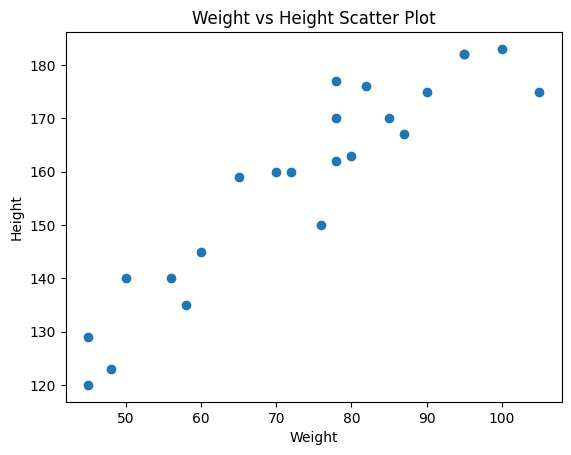

In [ ]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height Scatter Plot')
plt.show()

##Correlation

In [ ]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [ ]:
import seaborn as sns

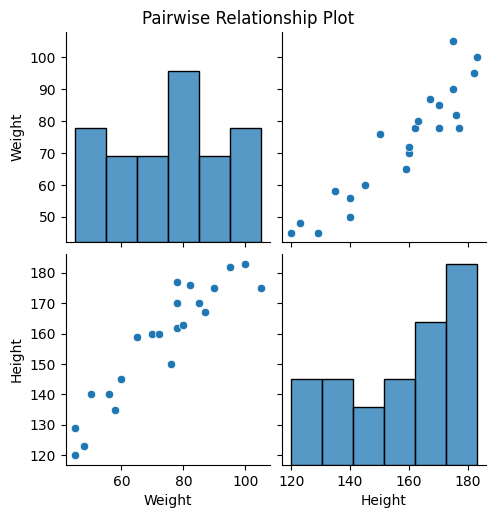

In [ ]:
pairplot = sns.pairplot(df)
pairplot.fig.suptitle('Pairwise Relationship Plot', y=1.02)
plt.show()

##Dependent and Independent Features

In [ ]:
X = df[['Weight']]#Independent features should be a  DataFrame or 2D array
y = df['Height']#Dependent features  can be series or 1D array

##Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(18, 1)

##Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)#formula z_score (z = x(i) - mu/std)
X_test = scaler.transform(X_test)#The concept of **Data Leakage** (mu = 0, std = 1)

In [ ]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [ ]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

##Apply Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression(n_jobs = 1)

In [ ]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [ ]:
print("Cofficient or slope : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Cofficient or slope :  [17.03440872]
Intercept :  157.5


##Best fit line

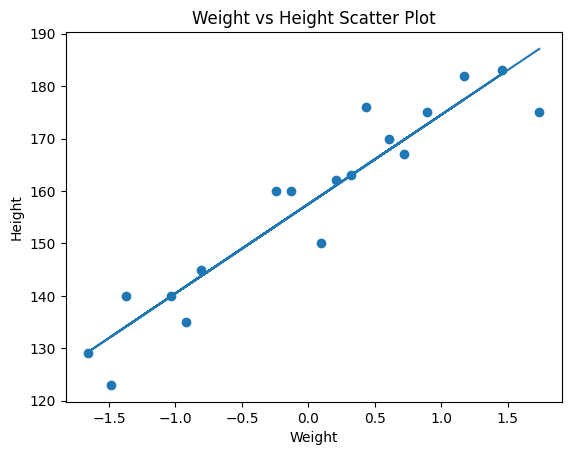

In [ ]:
##Plot training data and plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height Scatter Plot')
plt.show()

##Test Accuracy

In [ ]:
regression.score(X_test, y_test)

0.776986986042344

##Prediction on test data
1.Predicted height output = intercept + coef_(weight)


2.y_pred_test = 157.5 + 17.03(X_test)

In [ ]:
y_pred = regression.predict(X_test)
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

##Performance matrix

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 109.77592599051664
Mean Absolute Error (MAE): 9.822657814519232
Root Mean Squared Error (RMSE): 10.477400726827081


##R square
####R^2 = 1-SSR/SST
######R^2 = cofficient of Determination
######SSR = Sum of squares of residuals
######SST = Total sum of squares

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test, y_pred)
score

0.776986986042344

###Adjusted R^2 = 1 - [(1 - R^2)*(n - 1) / (n - k - 1)]

In [ ]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
#Adjusted R^2

0.7026493147231252

OLS